In [1]:
import pandas as pd
import pub_utils as pu

## Bentley2016 - monoamine connectome

Based on gene expression of receptors, transporters or synthetic enzymes of monoamines; 
Neurons expressing multiple receptors for a single monoamine receive a single edge from each sending neuron; 
Reciprocal connections between nodes are considered as two separate unidirectional connections.

In [2]:
from cect.WormNeuroAtlasMAReader import get_instance
dataset = get_instance()
print(dataset.summary())

nodes = dataset.nodes
serotonergic = dataset.connections['Serotonin']
dopaminergic = dataset.connections['Dopamine']
octopaminergic = dataset.connections['Octopamine']
tyraminergic = dataset.connections['Tyramine']

cect      >>>  Initialising WormNeuroAtlasExtSynReader for Monoaminergic
*This version of the NeuroAtlas does not include the CAN neurons. This will be fixed soon.
*In loading the anatomical connectome, the following conventions are used to allow for its comparison with the other datasets: AWCL->AWCOFF and AWCR->AWCON


/store1/shared/pub_utils/.venv/lib/python3.10/site-packages/wormneuroatlas/WormBase.py:52: UserWarning: Wormbase.org updated its database to a new version (WS298). The version of Worm Neuro Atlas that you are using has been built for the wormbase database version WS287. To ensure reproducible results, upgrade Worm Neuro Atlas with `python -m pip install --upgrade wormneuroatlas` If this warning persists after upgrading, let the developers know by opening an issue here: https://github.com/francescorandi/wormneuroatlas/issues. NOTE: You can still use Worm Neuro Atlas in the meantime. The metadata accessible via  wormneuroatlas.WormBase.get_metadata() and wormneuroatlas.NeuroAtlas.get_metadata() contain the version of wormbase that you are currently using, so make sure you save the metadata alongside your results. 
  warnings.warn(w)
/store1/shared/pub_utils/.venv/lib/python3.10/site-packages/wormneuroatlas/PeptideGPCR.py:31: UserWarning: Input line 1 contained no data and will not be cou

cect      >>>  Loading Bentley connectome for Dopamine....
cect      >>>  Loading Bentley connectome for Serotonin....
cect      >>>  Loading Bentley connectome for Tyramine....
cect      >>>  Loading Bentley connectome for Octopamine....
Nodes present (235): ['ADEL', 'ADER', 'ADFL', 'ADFR', 'ADLL', 'ADLR', 'AFDL', 'AFDR', 'AIAL', 'AIAR', 'AIBL', 'AIBR', 'AIML', 'AIMR', 'AIYL', 'AIYR', 'AIZL', 'AIZR', 'ALML', 'ALMR', 'ALNL', 'ALNR', 'AS1', 'AS10', 'AS11', 'AS2', 'AS3', 'AS4', 'AS5', 'AS6', 'AS7', 'AS8', 'AS9', 'ASEL', 'ASER', 'ASGL', 'ASGR', 'ASHL', 'ASHR', 'ASIL', 'ASIR', 'ASKL', 'ASKR', 'AUAL', 'AUAR', 'AVBL', 'AVBR', 'AVFL', 'AVFR', 'AVHL', 'AVHR', 'AVJL', 'AVJR', 'AVL', 'AVM', 'AWBL', 'AWBR', 'AWCL', 'AWCR', 'BAGL', 'BAGR', 'BDUL', 'BDUR', 'CEPDL', 'CEPDR', 'CEPVL', 'CEPVR', 'DA1', 'DA2', 'DA3', 'DA4', 'DA5', 'DA6', 'DA7', 'DA8', 'DA9', 'DB1', 'DB2', 'DB3', 'DB4', 'DB5', 'DB6', 'DB7', 'DD1', 'DD2', 'DD3', 'DD4', 'DD5', 'DD6', 'DVA', 'DVC', 'FLPL', 'FLPR', 'HSNL', 'HSNR', 'I1L', 'I1

Mapped 58 alternative names to neuronID:
  AS1 -> AS01
  AS2 -> AS02
  AS3 -> AS03
  AS4 -> AS04
  AS5 -> AS05
  AS6 -> AS06
  AS7 -> AS07
  AS8 -> AS08
  AS9 -> AS09
  DA1 -> DA01
  DA2 -> DA02
  DA3 -> DA03
  DA4 -> DA04
  DA5 -> DA05
  DA6 -> DA06
  DA7 -> DA07
  DA8 -> DA08
  DA9 -> DA09
  DB1 -> DB01
  DB2 -> DB02
  DB3 -> DB03
  DB4 -> DB04
  DB5 -> DB05
  DB6 -> DB06
  DB7 -> DB07
  DD1 -> DD01
  DD2 -> DD02
  DD3 -> DD03
  DD4 -> DD04
  DD5 -> DD05
  DD6 -> DD06
  VA1 -> VA01
  VA2 -> VA02
  VA3 -> VA03
  VA4 -> VA04
  VA5 -> VA05
  VA6 -> VA06
  VA7 -> VA07
  VA8 -> VA08
  VA9 -> VA09
  VB1 -> VB01
  VB2 -> VB02
  VB3 -> VB03
  VB4 -> VB04
  VB5 -> VB05
  VB6 -> VB06
  VB7 -> VB07
  VB8 -> VB08
  VB9 -> VB09
  VD1 -> VD01
  VD2 -> VD02
  VD3 -> VD03
  VD4 -> VD04
  VD5 -> VD05
  VD6 -> VD06
  VD7 -> VD07
  VD8 -> VD08
  VD9 -> VD09
Filling 67 missing neuronIDs with NaN:
  I5 (not found)
  MI (not found)
  ASJL (not found)
  ASJR (not found)
  AWAL (not found)
  AWAR (not found

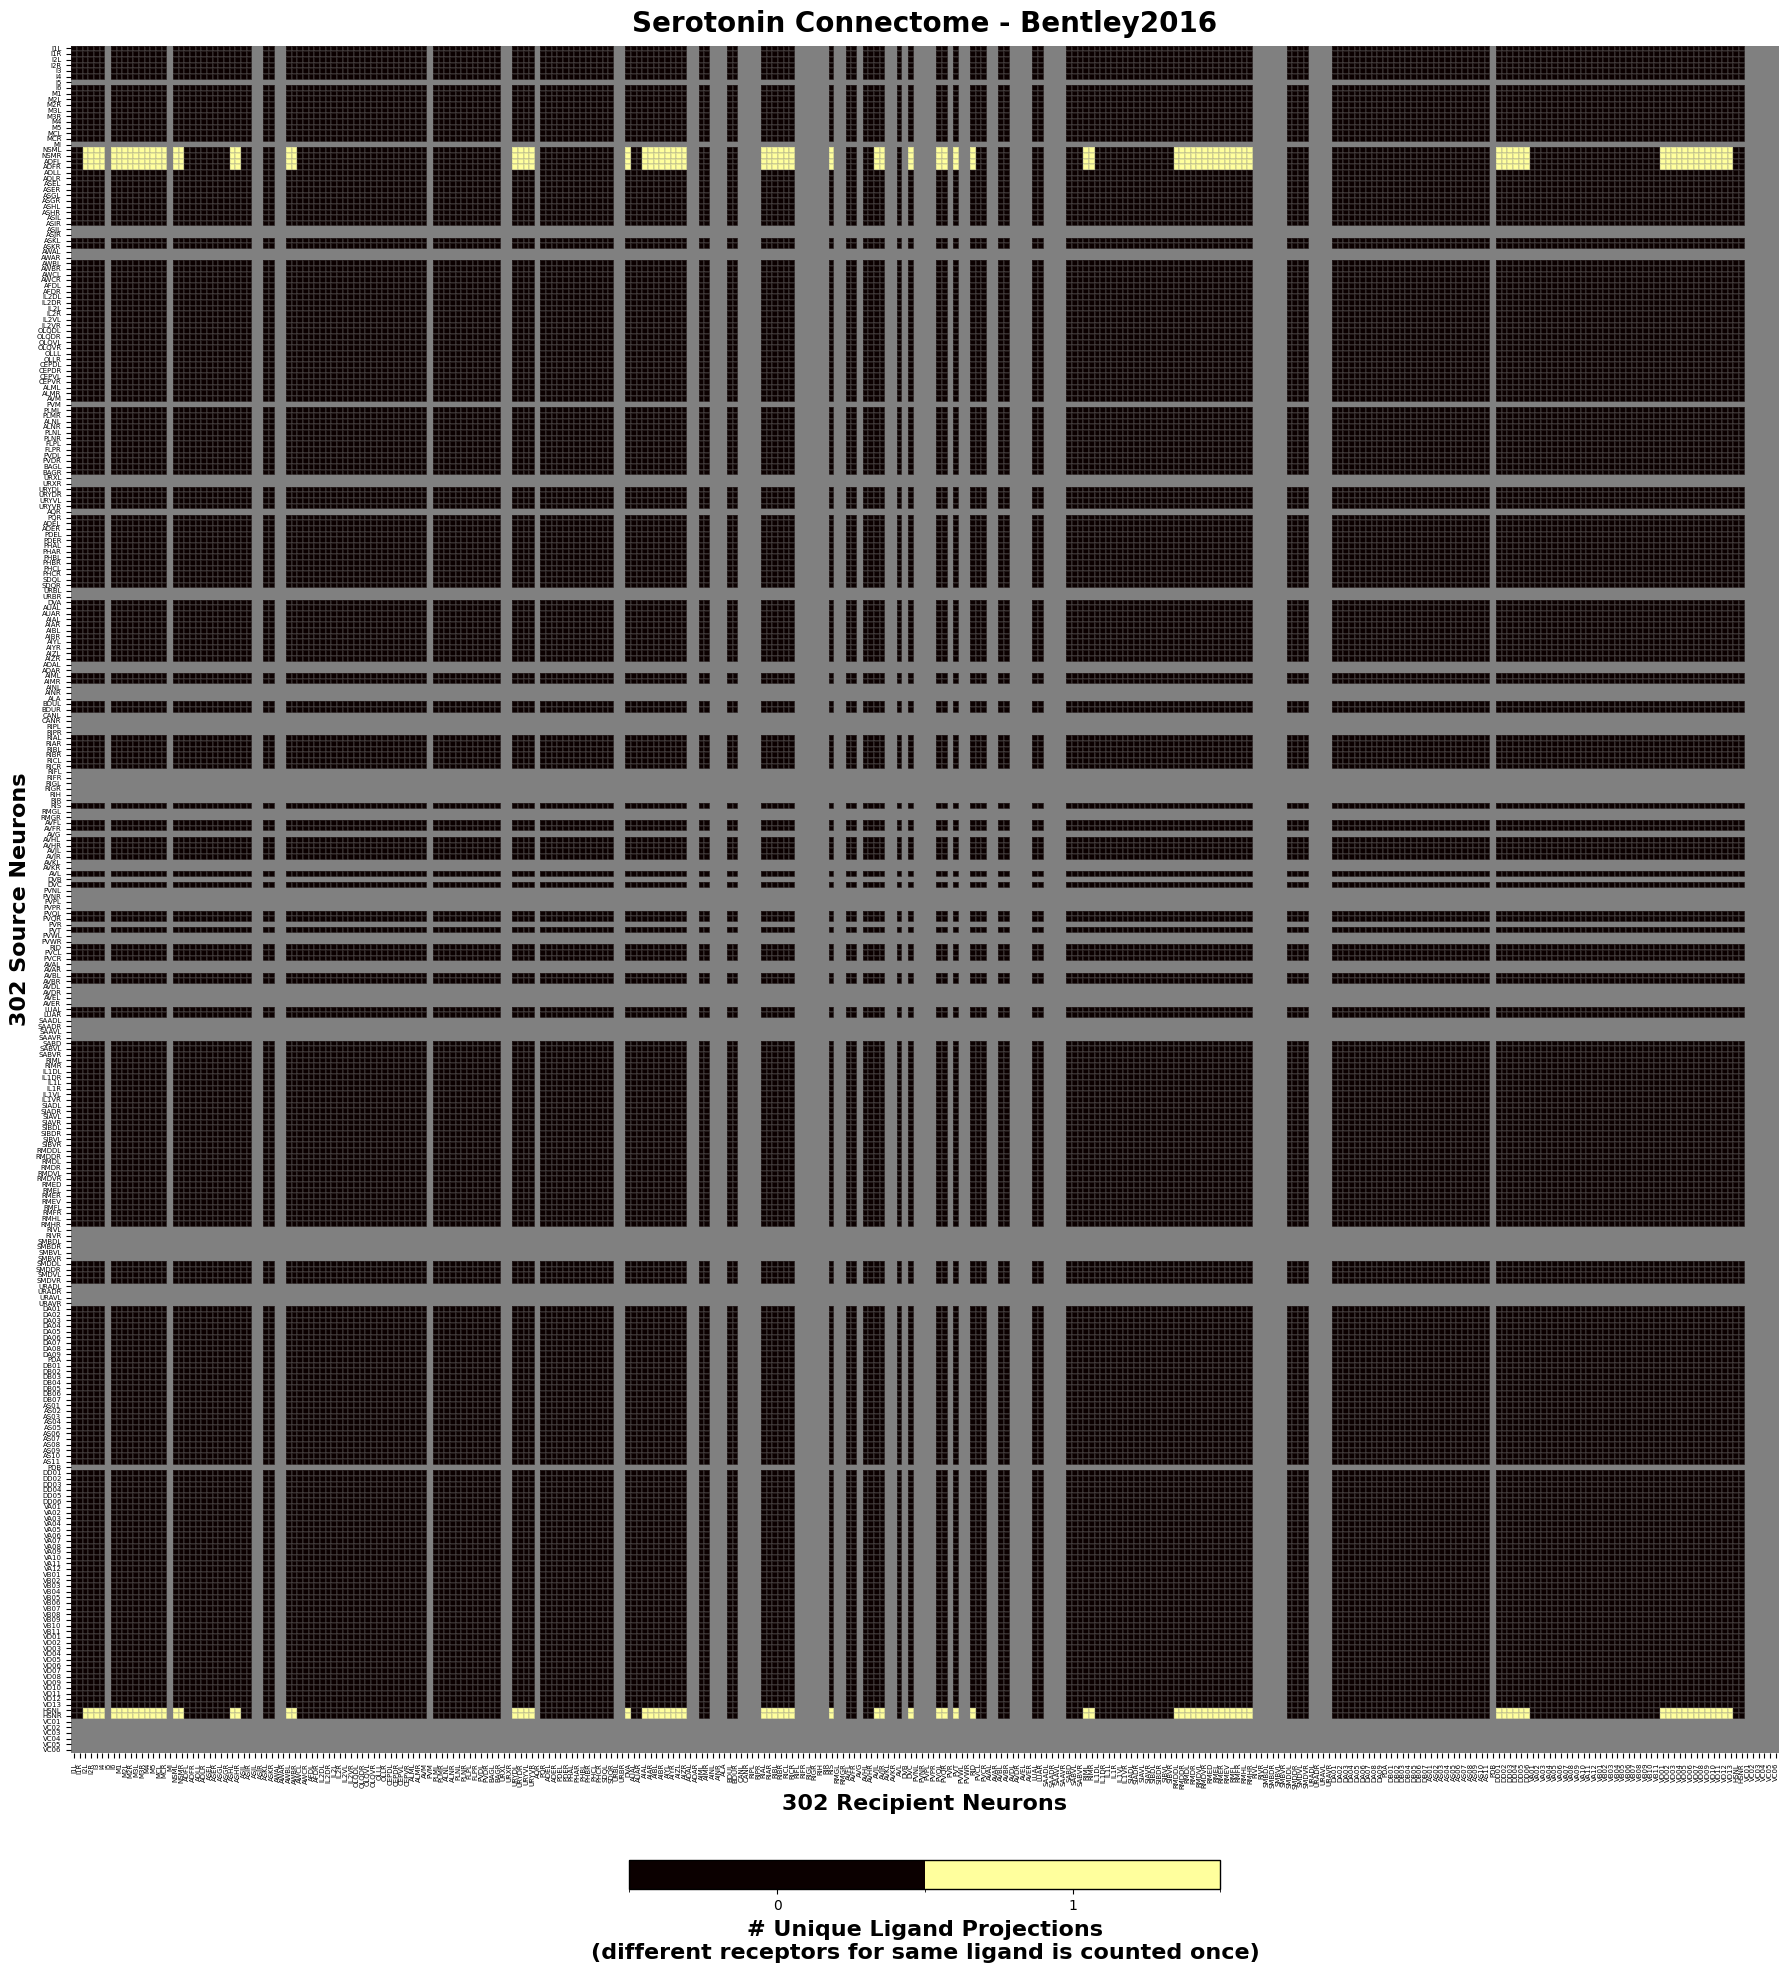

In [3]:
data = serotonergic
fname = 'serotonin_Bentley2016'
title = 'Serotonin Connectome - Bentley2016'
colorbar_label = '# Unique Ligand Projections\n(different receptors for same ligand is counted once)'

df = pd.DataFrame(data, index=nodes, columns=nodes)
std_df = pu.standardize_dataframe(df, pu.AllHermNeurons)
std_df.to_csv(f'../connectomes/preassembled/{fname}.csv')

std_fig = pu.plot_connectome_matrix(std_df, title=title, colorbar_label=colorbar_label)
std_fig.savefig(f'../plots/{fname}.png', dpi=600, bbox_inches='tight')

Mapped 58 alternative names to neuronID:
  AS1 -> AS01
  AS2 -> AS02
  AS3 -> AS03
  AS4 -> AS04
  AS5 -> AS05
  AS6 -> AS06
  AS7 -> AS07
  AS8 -> AS08
  AS9 -> AS09
  DA1 -> DA01
  DA2 -> DA02
  DA3 -> DA03
  DA4 -> DA04
  DA5 -> DA05
  DA6 -> DA06
  DA7 -> DA07
  DA8 -> DA08
  DA9 -> DA09
  DB1 -> DB01
  DB2 -> DB02
  DB3 -> DB03
  DB4 -> DB04
  DB5 -> DB05
  DB6 -> DB06
  DB7 -> DB07
  DD1 -> DD01
  DD2 -> DD02
  DD3 -> DD03
  DD4 -> DD04
  DD5 -> DD05
  DD6 -> DD06
  VA1 -> VA01
  VA2 -> VA02
  VA3 -> VA03
  VA4 -> VA04
  VA5 -> VA05
  VA6 -> VA06
  VA7 -> VA07
  VA8 -> VA08
  VA9 -> VA09
  VB1 -> VB01
  VB2 -> VB02
  VB3 -> VB03
  VB4 -> VB04
  VB5 -> VB05
  VB6 -> VB06
  VB7 -> VB07
  VB8 -> VB08
  VB9 -> VB09
  VD1 -> VD01
  VD2 -> VD02
  VD3 -> VD03
  VD4 -> VD04
  VD5 -> VD05
  VD6 -> VD06
  VD7 -> VD07
  VD8 -> VD08
  VD9 -> VD09
Filling 67 missing neuronIDs with NaN:
  I5 (not found)
  MI (not found)
  ASJL (not found)
  ASJR (not found)
  AWAL (not found)
  AWAR (not found

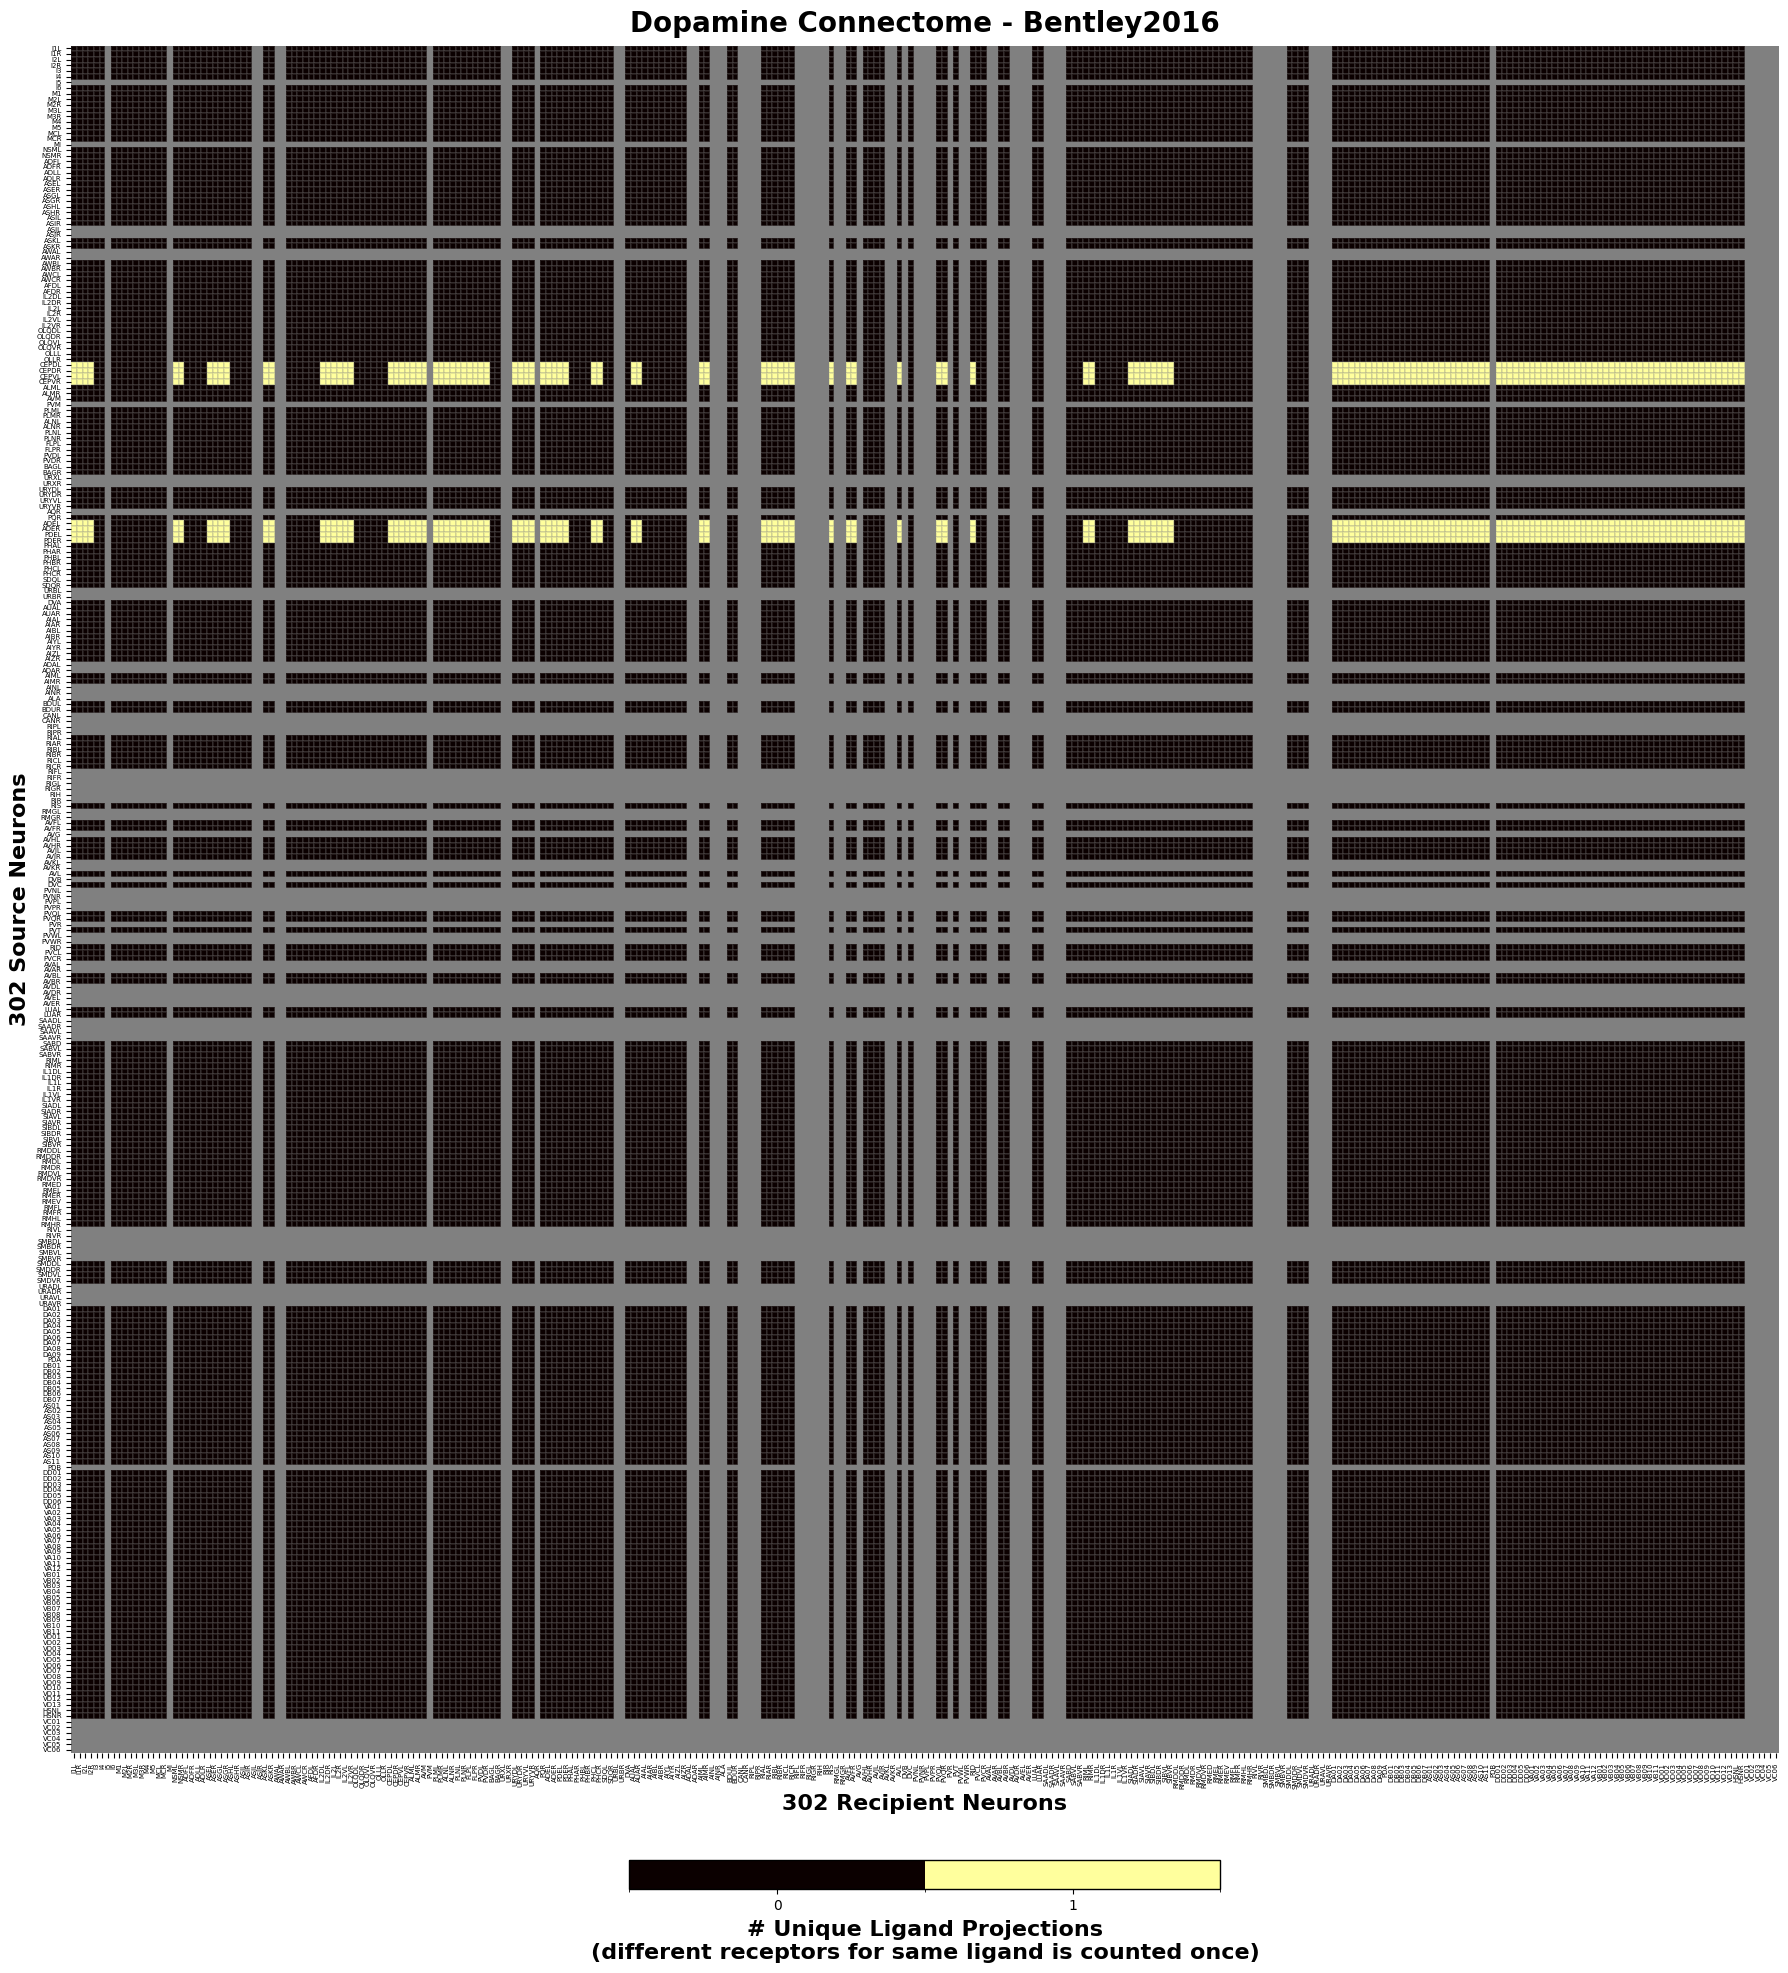

In [4]:
data = dopaminergic
fname = 'dopamine_Bentley2016'
title = 'Dopamine Connectome - Bentley2016'
colorbar_label = '# Unique Ligand Projections\n(different receptors for same ligand is counted once)'

df = pd.DataFrame(data, index=nodes, columns=nodes)
std_df = pu.standardize_dataframe(df, pu.AllHermNeurons)
std_df.to_csv(f'../connectomes/preassembled/{fname}.csv')

std_fig = pu.plot_connectome_matrix(std_df, title=title, colorbar_label=colorbar_label)
std_fig.savefig(f'../plots/{fname}.png', dpi=600, bbox_inches='tight')

Mapped 58 alternative names to neuronID:
  AS1 -> AS01
  AS2 -> AS02
  AS3 -> AS03
  AS4 -> AS04
  AS5 -> AS05
  AS6 -> AS06
  AS7 -> AS07
  AS8 -> AS08
  AS9 -> AS09
  DA1 -> DA01
  DA2 -> DA02
  DA3 -> DA03
  DA4 -> DA04
  DA5 -> DA05
  DA6 -> DA06
  DA7 -> DA07
  DA8 -> DA08
  DA9 -> DA09
  DB1 -> DB01
  DB2 -> DB02
  DB3 -> DB03
  DB4 -> DB04
  DB5 -> DB05
  DB6 -> DB06
  DB7 -> DB07
  DD1 -> DD01
  DD2 -> DD02
  DD3 -> DD03
  DD4 -> DD04
  DD5 -> DD05
  DD6 -> DD06
  VA1 -> VA01
  VA2 -> VA02
  VA3 -> VA03
  VA4 -> VA04
  VA5 -> VA05
  VA6 -> VA06
  VA7 -> VA07
  VA8 -> VA08
  VA9 -> VA09
  VB1 -> VB01
  VB2 -> VB02
  VB3 -> VB03
  VB4 -> VB04
  VB5 -> VB05
  VB6 -> VB06
  VB7 -> VB07
  VB8 -> VB08
  VB9 -> VB09
  VD1 -> VD01
  VD2 -> VD02
  VD3 -> VD03
  VD4 -> VD04
  VD5 -> VD05
  VD6 -> VD06
  VD7 -> VD07
  VD8 -> VD08
  VD9 -> VD09
Filling 67 missing neuronIDs with NaN:
  I5 (not found)
  MI (not found)
  ASJL (not found)
  ASJR (not found)
  AWAL (not found)
  AWAR (not found

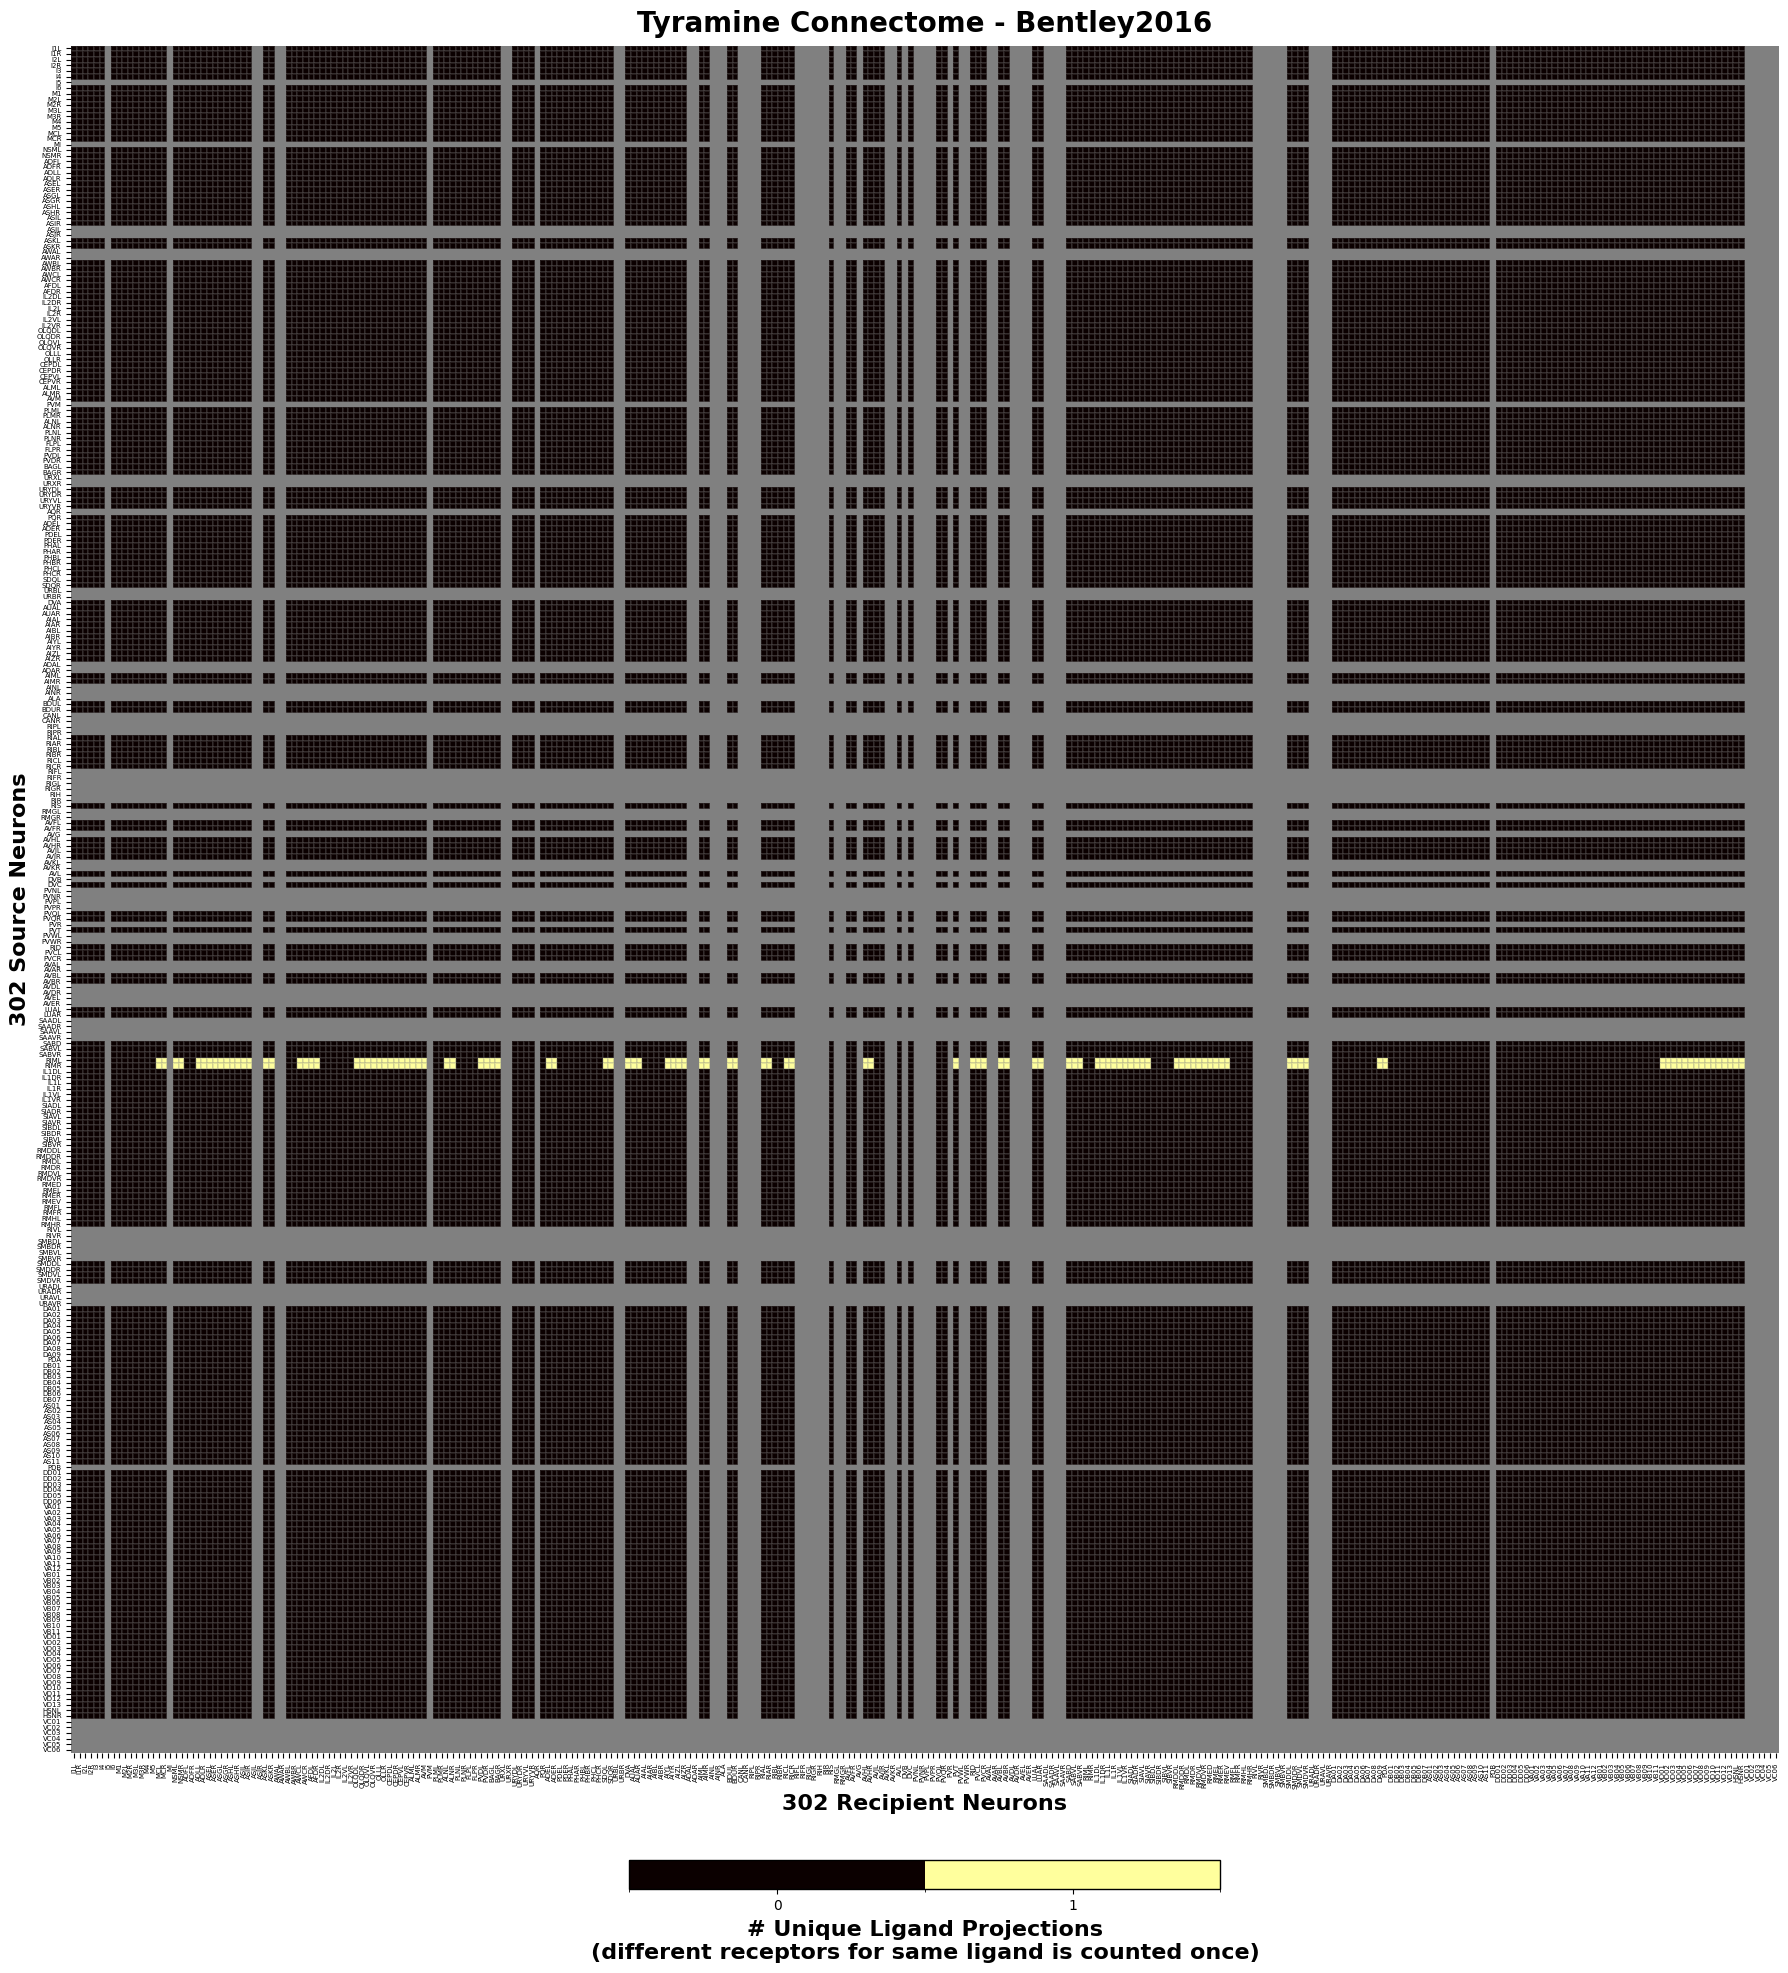

In [5]:
data = tyraminergic
fname = 'tyramine_Bentley2016'
title = 'Tyramine Connectome - Bentley2016'
colorbar_label = '# Unique Ligand Projections\n(different receptors for same ligand is counted once)'

df = pd.DataFrame(data, index=nodes, columns=nodes)
std_df = pu.standardize_dataframe(df, pu.AllHermNeurons)
std_df.to_csv(f'../connectomes/preassembled/{fname}.csv')

std_fig = pu.plot_connectome_matrix(std_df, title=title, colorbar_label=colorbar_label)
std_fig.savefig(f'../plots/{fname}.png', dpi=600, bbox_inches='tight')

Mapped 58 alternative names to neuronID:
  AS1 -> AS01
  AS2 -> AS02
  AS3 -> AS03
  AS4 -> AS04
  AS5 -> AS05
  AS6 -> AS06
  AS7 -> AS07
  AS8 -> AS08
  AS9 -> AS09
  DA1 -> DA01
  DA2 -> DA02
  DA3 -> DA03
  DA4 -> DA04
  DA5 -> DA05
  DA6 -> DA06
  DA7 -> DA07
  DA8 -> DA08
  DA9 -> DA09
  DB1 -> DB01
  DB2 -> DB02
  DB3 -> DB03
  DB4 -> DB04
  DB5 -> DB05
  DB6 -> DB06
  DB7 -> DB07
  DD1 -> DD01
  DD2 -> DD02
  DD3 -> DD03
  DD4 -> DD04
  DD5 -> DD05
  DD6 -> DD06
  VA1 -> VA01
  VA2 -> VA02
  VA3 -> VA03
  VA4 -> VA04
  VA5 -> VA05
  VA6 -> VA06
  VA7 -> VA07
  VA8 -> VA08
  VA9 -> VA09
  VB1 -> VB01
  VB2 -> VB02
  VB3 -> VB03
  VB4 -> VB04
  VB5 -> VB05
  VB6 -> VB06
  VB7 -> VB07
  VB8 -> VB08
  VB9 -> VB09
  VD1 -> VD01
  VD2 -> VD02
  VD3 -> VD03
  VD4 -> VD04
  VD5 -> VD05
  VD6 -> VD06
  VD7 -> VD07
  VD8 -> VD08
  VD9 -> VD09
Filling 67 missing neuronIDs with NaN:
  I5 (not found)
  MI (not found)
  ASJL (not found)
  ASJR (not found)
  AWAL (not found)
  AWAR (not found

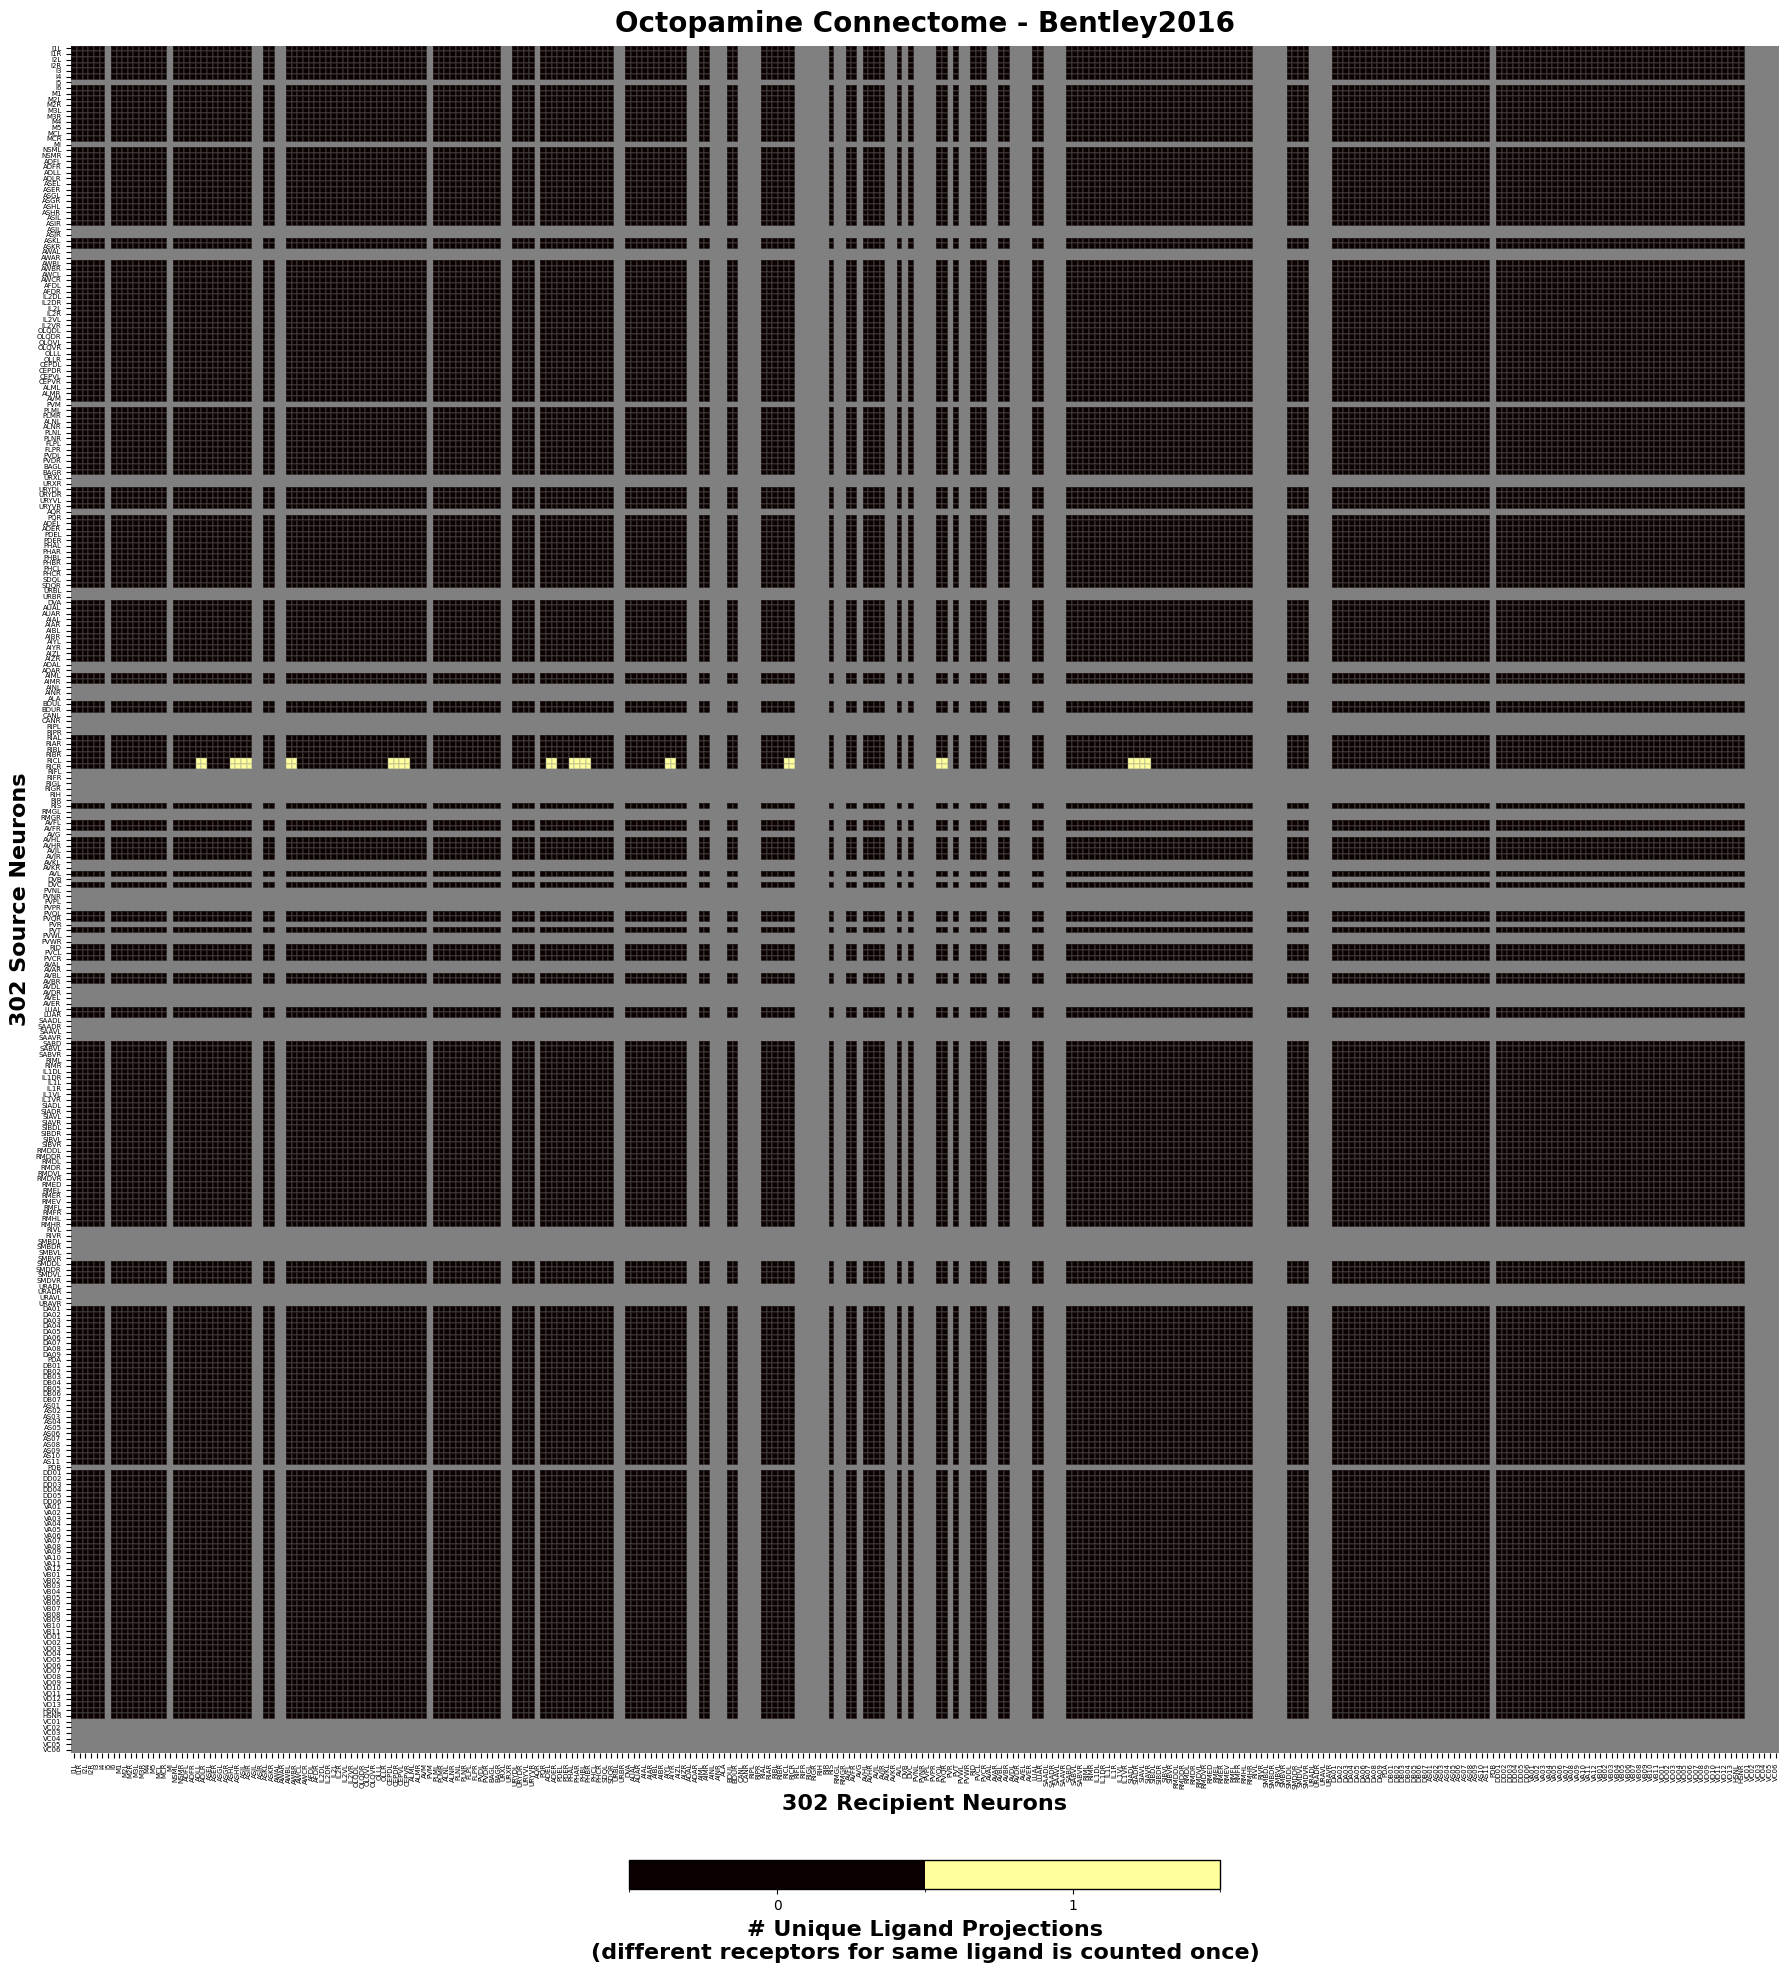

In [6]:
data = octopaminergic
fname = 'octopamine_Bentley2016'
title = 'Octopamine Connectome - Bentley2016'
colorbar_label = '# Unique Ligand Projections\n(different receptors for same ligand is counted once)'

df = pd.DataFrame(data, index=nodes, columns=nodes)
std_df = pu.standardize_dataframe(df, pu.AllHermNeurons)
std_df.to_csv(f'../connectomes/preassembled/{fname}.csv')

std_fig = pu.plot_connectome_matrix(std_df, title=title, colorbar_label=colorbar_label)
std_fig.savefig(f'../plots/{fname}.png', dpi=600, bbox_inches='tight')

## Bentley2016 - neuropeptide connectome

cect      >>>  Initialising WormNeuroAtlasExtSynReader for Peptidergic
*This version of the NeuroAtlas does not include the CAN neurons. This will be fixed soon.
*In loading the anatomical connectome, the following conventions are used to allow for its comparison with the other datasets: AWCL->AWCOFF and AWCR->AWCON


/store1/shared/pub_utils/.venv/lib/python3.10/site-packages/wormneuroatlas/WormBase.py:52: UserWarning: Wormbase.org updated its database to a new version (WS298). The version of Worm Neuro Atlas that you are using has been built for the wormbase database version WS287. To ensure reproducible results, upgrade Worm Neuro Atlas with `python -m pip install --upgrade wormneuroatlas` If this warning persists after upgrading, let the developers know by opening an issue here: https://github.com/francescorandi/wormneuroatlas/issues. NOTE: You can still use Worm Neuro Atlas in the meantime. The metadata accessible via  wormneuroatlas.WormBase.get_metadata() and wormneuroatlas.NeuroAtlas.get_metadata() contain the version of wormbase that you are currently using, so make sure you save the metadata alongside your results. 
  warnings.warn(w)
/store1/shared/pub_utils/.venv/lib/python3.10/site-packages/wormneuroatlas/PeptideGPCR.py:31: UserWarning: Input line 1 contained no data and will not be cou

Nodes present (300): ['ADAL', 'ADAR', 'ADEL', 'ADER', 'ADFL', 'ADFR', 'ADLL', 'ADLR', 'AFDL', 'AFDR', 'AIAL', 'AIAR', 'AIBL', 'AIBR', 'AIML', 'AIMR', 'AINL', 'AINR', 'AIYL', 'AIYR', 'AIZL', 'AIZR', 'ALA', 'ALML', 'ALMR', 'ALNL', 'ALNR', 'AQR', 'AS1', 'AS10', 'AS11', 'AS2', 'AS3', 'AS4', 'AS5', 'AS6', 'AS7', 'AS8', 'AS9', 'ASEL', 'ASER', 'ASGL', 'ASGR', 'ASHL', 'ASHR', 'ASIL', 'ASIR', 'ASJL', 'ASJR', 'ASKL', 'ASKR', 'AUAL', 'AUAR', 'AVAL', 'AVAR', 'AVBL', 'AVBR', 'AVDL', 'AVDR', 'AVEL', 'AVER', 'AVFL', 'AVFR', 'AVG', 'AVHL', 'AVHR', 'AVJL', 'AVJR', 'AVKL', 'AVKR', 'AVL', 'AVM', 'AWAL', 'AWAR', 'AWBL', 'AWBR', 'AWCL', 'AWCR', 'BAGL', 'BAGR', 'BDUL', 'BDUR', 'CEPDL', 'CEPDR', 'CEPVL', 'CEPVR', 'DA1', 'DA2', 'DA3', 'DA4', 'DA5', 'DA6', 'DA7', 'DA8', 'DA9', 'DB1', 'DB2', 'DB3', 'DB4', 'DB5', 'DB6', 'DB7', 'DD1', 'DD2', 'DD3', 'DD4', 'DD5', 'DD6', 'DVA', 'DVB', 'DVC', 'FLPL', 'FLPR', 'HSNL', 'HSNR', 'I1L', 'I1R', 'I2L', 'I2R', 'I3', 'I4', 'I5', 'I6', 'IL1DL', 'IL1DR', 'IL1L', 'IL1R', 'IL1VL'

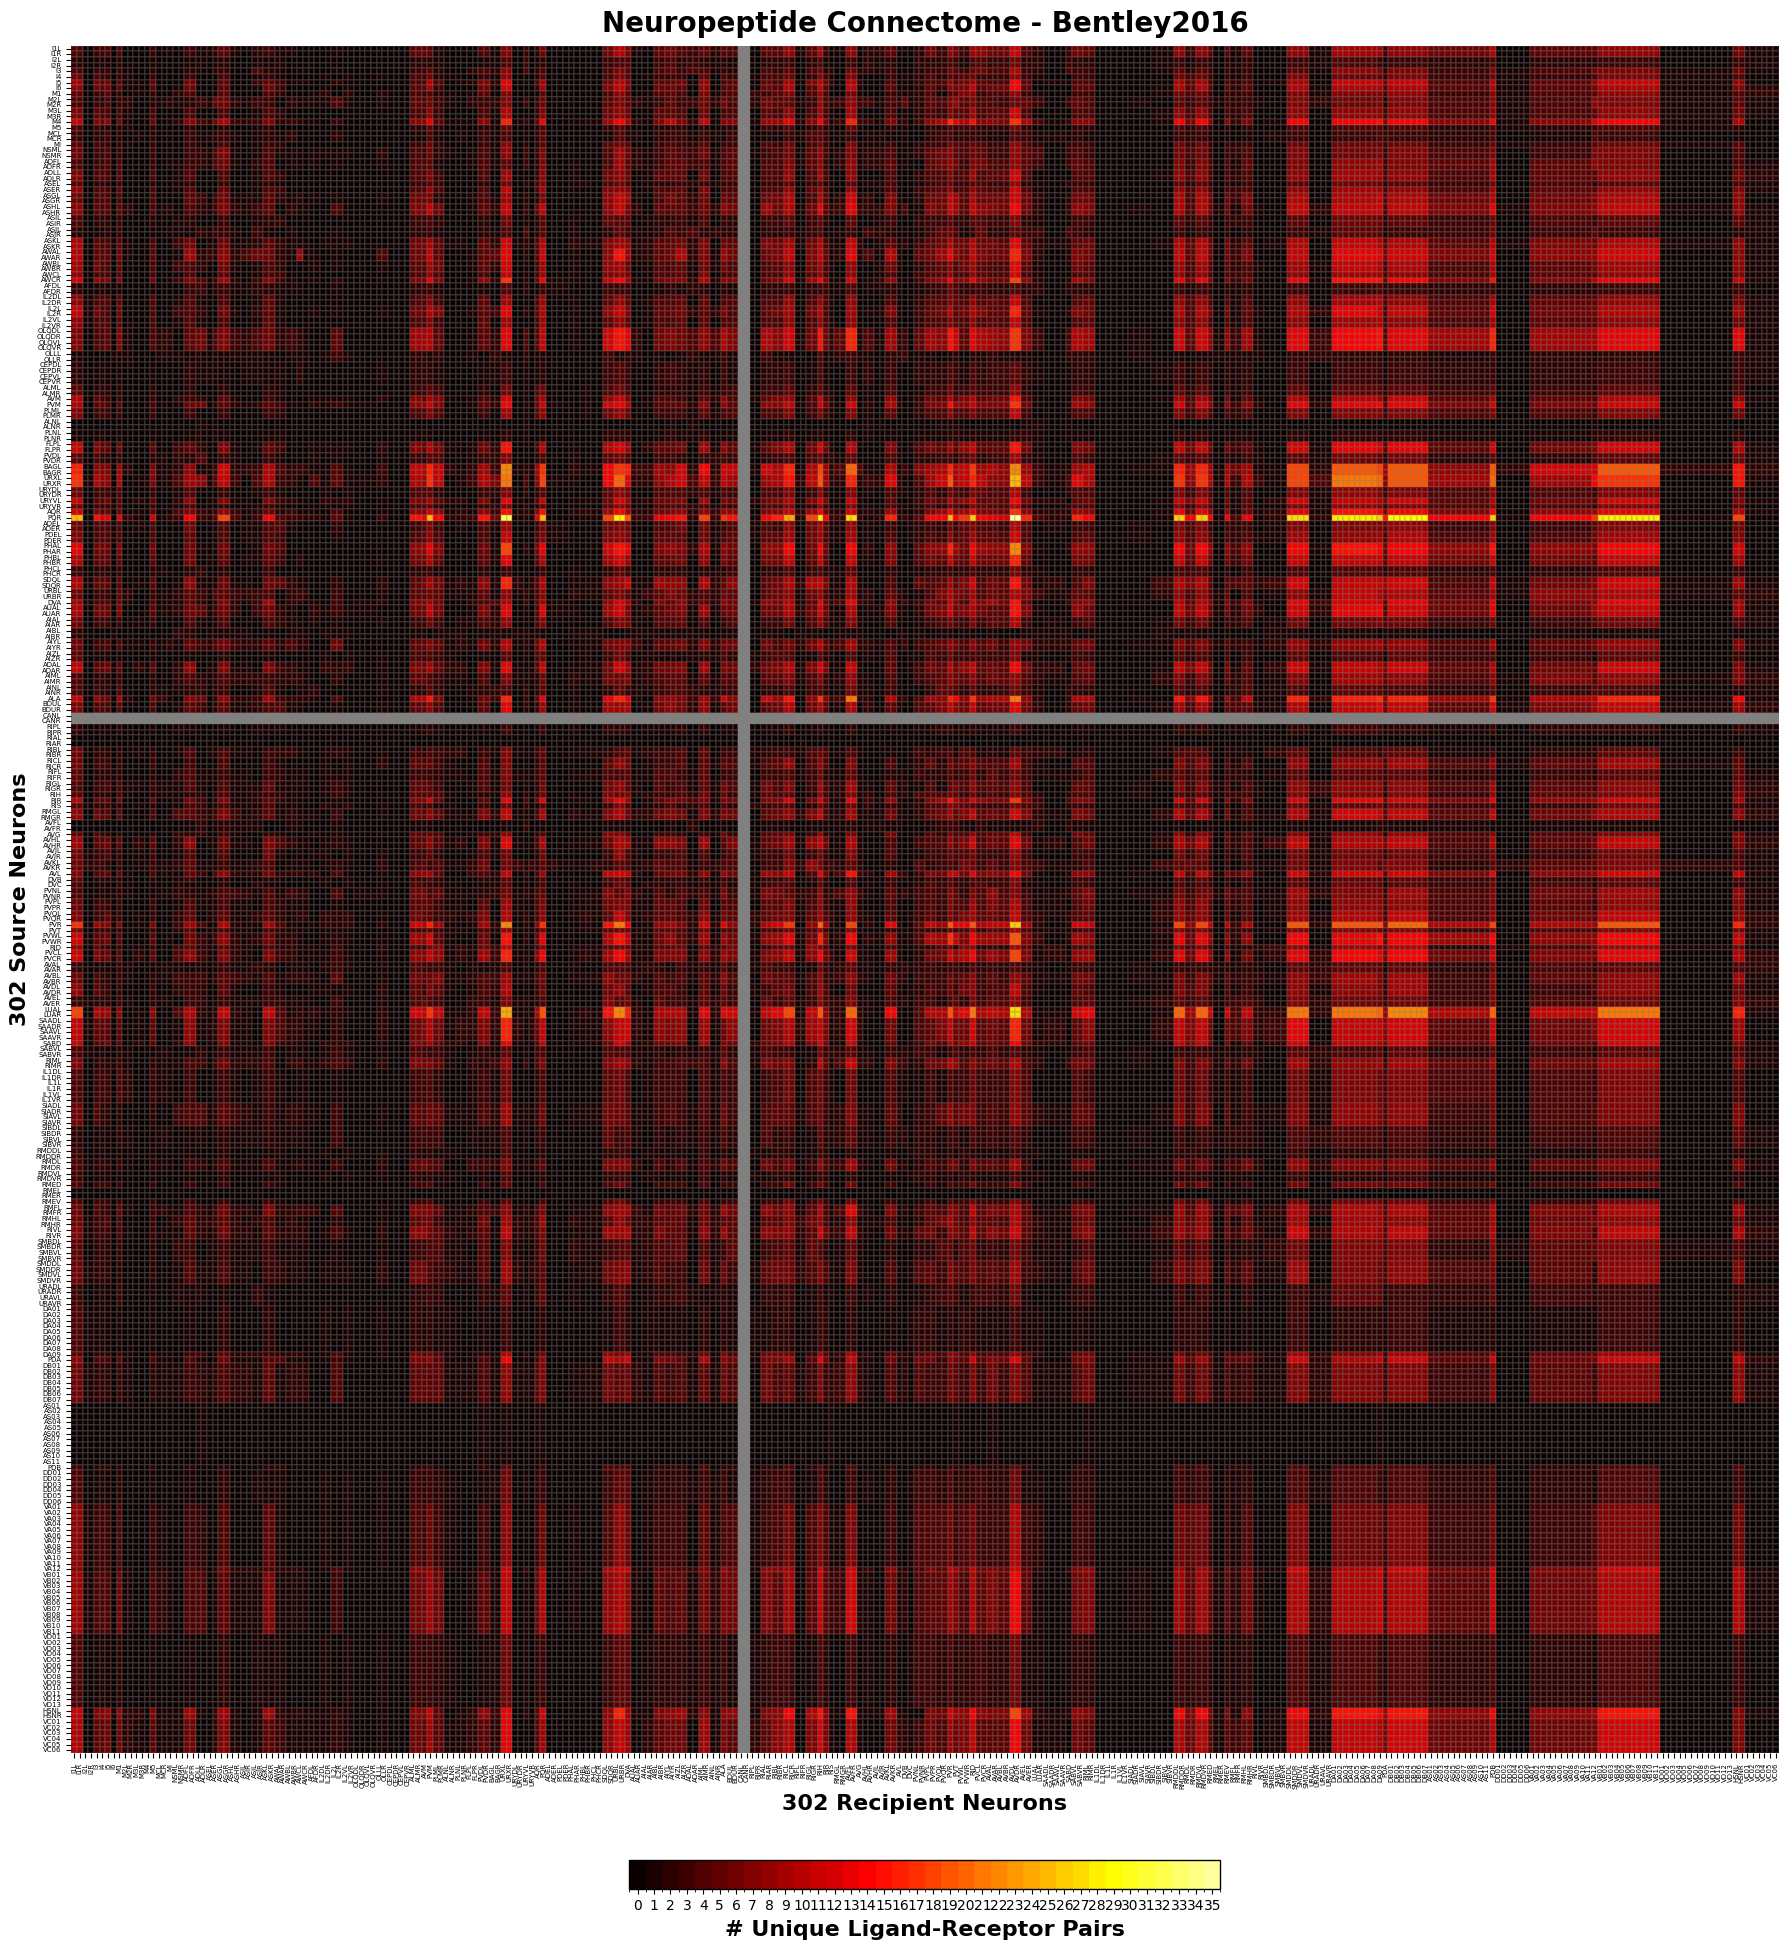

In [7]:
from cect.WormNeuroAtlasPepReader import get_instance

dataset = get_instance()
print(dataset.summary())

nodes = dataset.nodes
peptidergic = dataset.connections['Peptidergic']   # Bentley2016

data = peptidergic
fname = 'NPP_Bentley2016'
title = 'Neuropeptide Connectome - Bentley2016'

df = pd.DataFrame(data, index=nodes, columns=nodes)
std_df = pu.standardize_dataframe(df, pu.AllHermNeurons)
std_df.to_pickle(f'../processed/{fname}.pkl')

std_fig = pu.plot_connectome_matrix(std_df, title=title)
std_fig.savefig(f'../plots/{fname}.png', dpi=600, bbox_inches='tight')

## Pooled data by Randi on WormNeuroAtlas
These values reflect results of modeling and therefore not fully trusted. The raw data was extracted by Fenyves2020.

In [13]:
from cect.WormNeuroAtlasReader import get_instance

dataset = get_instance()
print(dataset.summary())

nodes = dataset.nodes
gap_junctions = dataset.connections['Generic_GJ']
cholinergic = dataset.connections['Acetylcholine']
glutamatergic = dataset.connections['Glutamate']
gabaergic = dataset.connections['GABA']

cect      >>>  Initialising WormNeuroAtlasReader
*This version of the NeuroAtlas does not include the CAN neurons. This will be fixed soon.


/store1/shared/pub_utils/.venv/lib/python3.10/site-packages/wormneuroatlas/WormBase.py:52: UserWarning: Wormbase.org updated its database to a new version (WS298). The version of Worm Neuro Atlas that you are using has been built for the wormbase database version WS287. To ensure reproducible results, upgrade Worm Neuro Atlas with `python -m pip install --upgrade wormneuroatlas` If this warning persists after upgrading, let the developers know by opening an issue here: https://github.com/francescorandi/wormneuroatlas/issues. NOTE: You can still use Worm Neuro Atlas in the meantime. The metadata accessible via  wormneuroatlas.WormBase.get_metadata() and wormneuroatlas.NeuroAtlas.get_metadata() contain the version of wormbase that you are currently using, so make sure you save the metadata alongside your results. 
  warnings.warn(w)
/store1/shared/pub_utils/.venv/lib/python3.10/site-packages/wormneuroatlas/PeptideGPCR.py:31: UserWarning: Input line 1 contained no data and will not be cou

*In loading the anatomical connectome, the following conventions are used to allow for its comparison with the other datasets: AWCL->AWCOFF and AWCR->AWCON
Nodes present (298): ['ADAL', 'ADAR', 'ADEL', 'ADER', 'ADFL', 'ADFR', 'ADLL', 'ADLR', 'AFDL', 'AFDR', 'AIAL', 'AIAR', 'AIBL', 'AIBR', 'AIML', 'AIMR', 'AINL', 'AINR', 'AIYL', 'AIYR', 'AIZL', 'AIZR', 'ALA', 'ALML', 'ALMR', 'ALNL', 'ALNR', 'AQR', 'AS1', 'AS10', 'AS11', 'AS2', 'AS3', 'AS4', 'AS5', 'AS6', 'AS7', 'AS8', 'AS9', 'ASEL', 'ASER', 'ASGL', 'ASGR', 'ASHL', 'ASHR', 'ASIL', 'ASIR', 'ASJL', 'ASJR', 'ASKL', 'ASKR', 'AUAL', 'AUAR', 'AVAL', 'AVAR', 'AVBL', 'AVBR', 'AVDL', 'AVDR', 'AVEL', 'AVER', 'AVFL', 'AVFR', 'AVG', 'AVHL', 'AVHR', 'AVJL', 'AVJR', 'AVKL', 'AVKR', 'AVL', 'AVM', 'AWAL', 'AWAR', 'AWBL', 'AWBR', 'BAGL', 'BAGR', 'BDUL', 'BDUR', 'CEPDL', 'CEPDR', 'CEPVL', 'CEPVR', 'DA1', 'DA2', 'DA3', 'DA4', 'DA5', 'DA6', 'DA7', 'DA8', 'DA9', 'DB1', 'DB2', 'DB3', 'DB4', 'DB5', 'DB6', 'DB7', 'DD1', 'DD2', 'DD3', 'DD4', 'DD5', 'DD6', 'DVA',

Mapped 64 alternative names to neuronID:
  VD9 -> VD09
  DB1 -> DB01
  VB1 -> VB01
  VB2 -> VB02
  AS1 -> AS01
  DA1 -> DA01
  VA3 -> VA03
  VD1 -> VD01
  VD2 -> VD02
  AS2 -> AS02
  DA2 -> DA02
  DD1 -> DD01
  VA4 -> VA04
  AS3 -> AS03
  DA3 -> DA03
  VA5 -> VA05
  VD3 -> VD03
  AS4 -> AS04
  AS5 -> AS05
  VD4 -> VD04
  DD2 -> DD02
  VA7 -> VA07
  VD5 -> VD05
  AS6 -> AS06
  DA5 -> DA05
  VA8 -> VA08
  VD6 -> VD06
  AS7 -> AS07
  AS8 -> AS08
  AS9 -> AS09
  DA4 -> DA04
  DA6 -> DA06
  DA7 -> DA07
  DA8 -> DA08
  DA9 -> DA09
  DB5 -> DB05
  DB6 -> DB06
  VA1 -> VA01
  VA2 -> VA02
  VA6 -> VA06
  VA9 -> VA09
  VB9 -> VB09
  DB3 -> DB03
  DB4 -> DB04
  DB7 -> DB07
  VB4 -> VB04
  VB5 -> VB05
  VB6 -> VB06
  VB7 -> VB07
  VB8 -> VB08
  VC3 -> VC03
  DB2 -> DB02
  VB3 -> VB03
  VC4 -> VC04
  DD6 -> DD06
  DD3 -> DD03
  DD4 -> DD04
  VD8 -> VD08
  DD5 -> DD05
  VC5 -> VC05
  VC2 -> VC02
  VD7 -> VD07
  VC1 -> VC01
  VC6 -> VC06
Filling 4 missing neuronIDs with NaN:
  AWCL (not found)
  AWCR

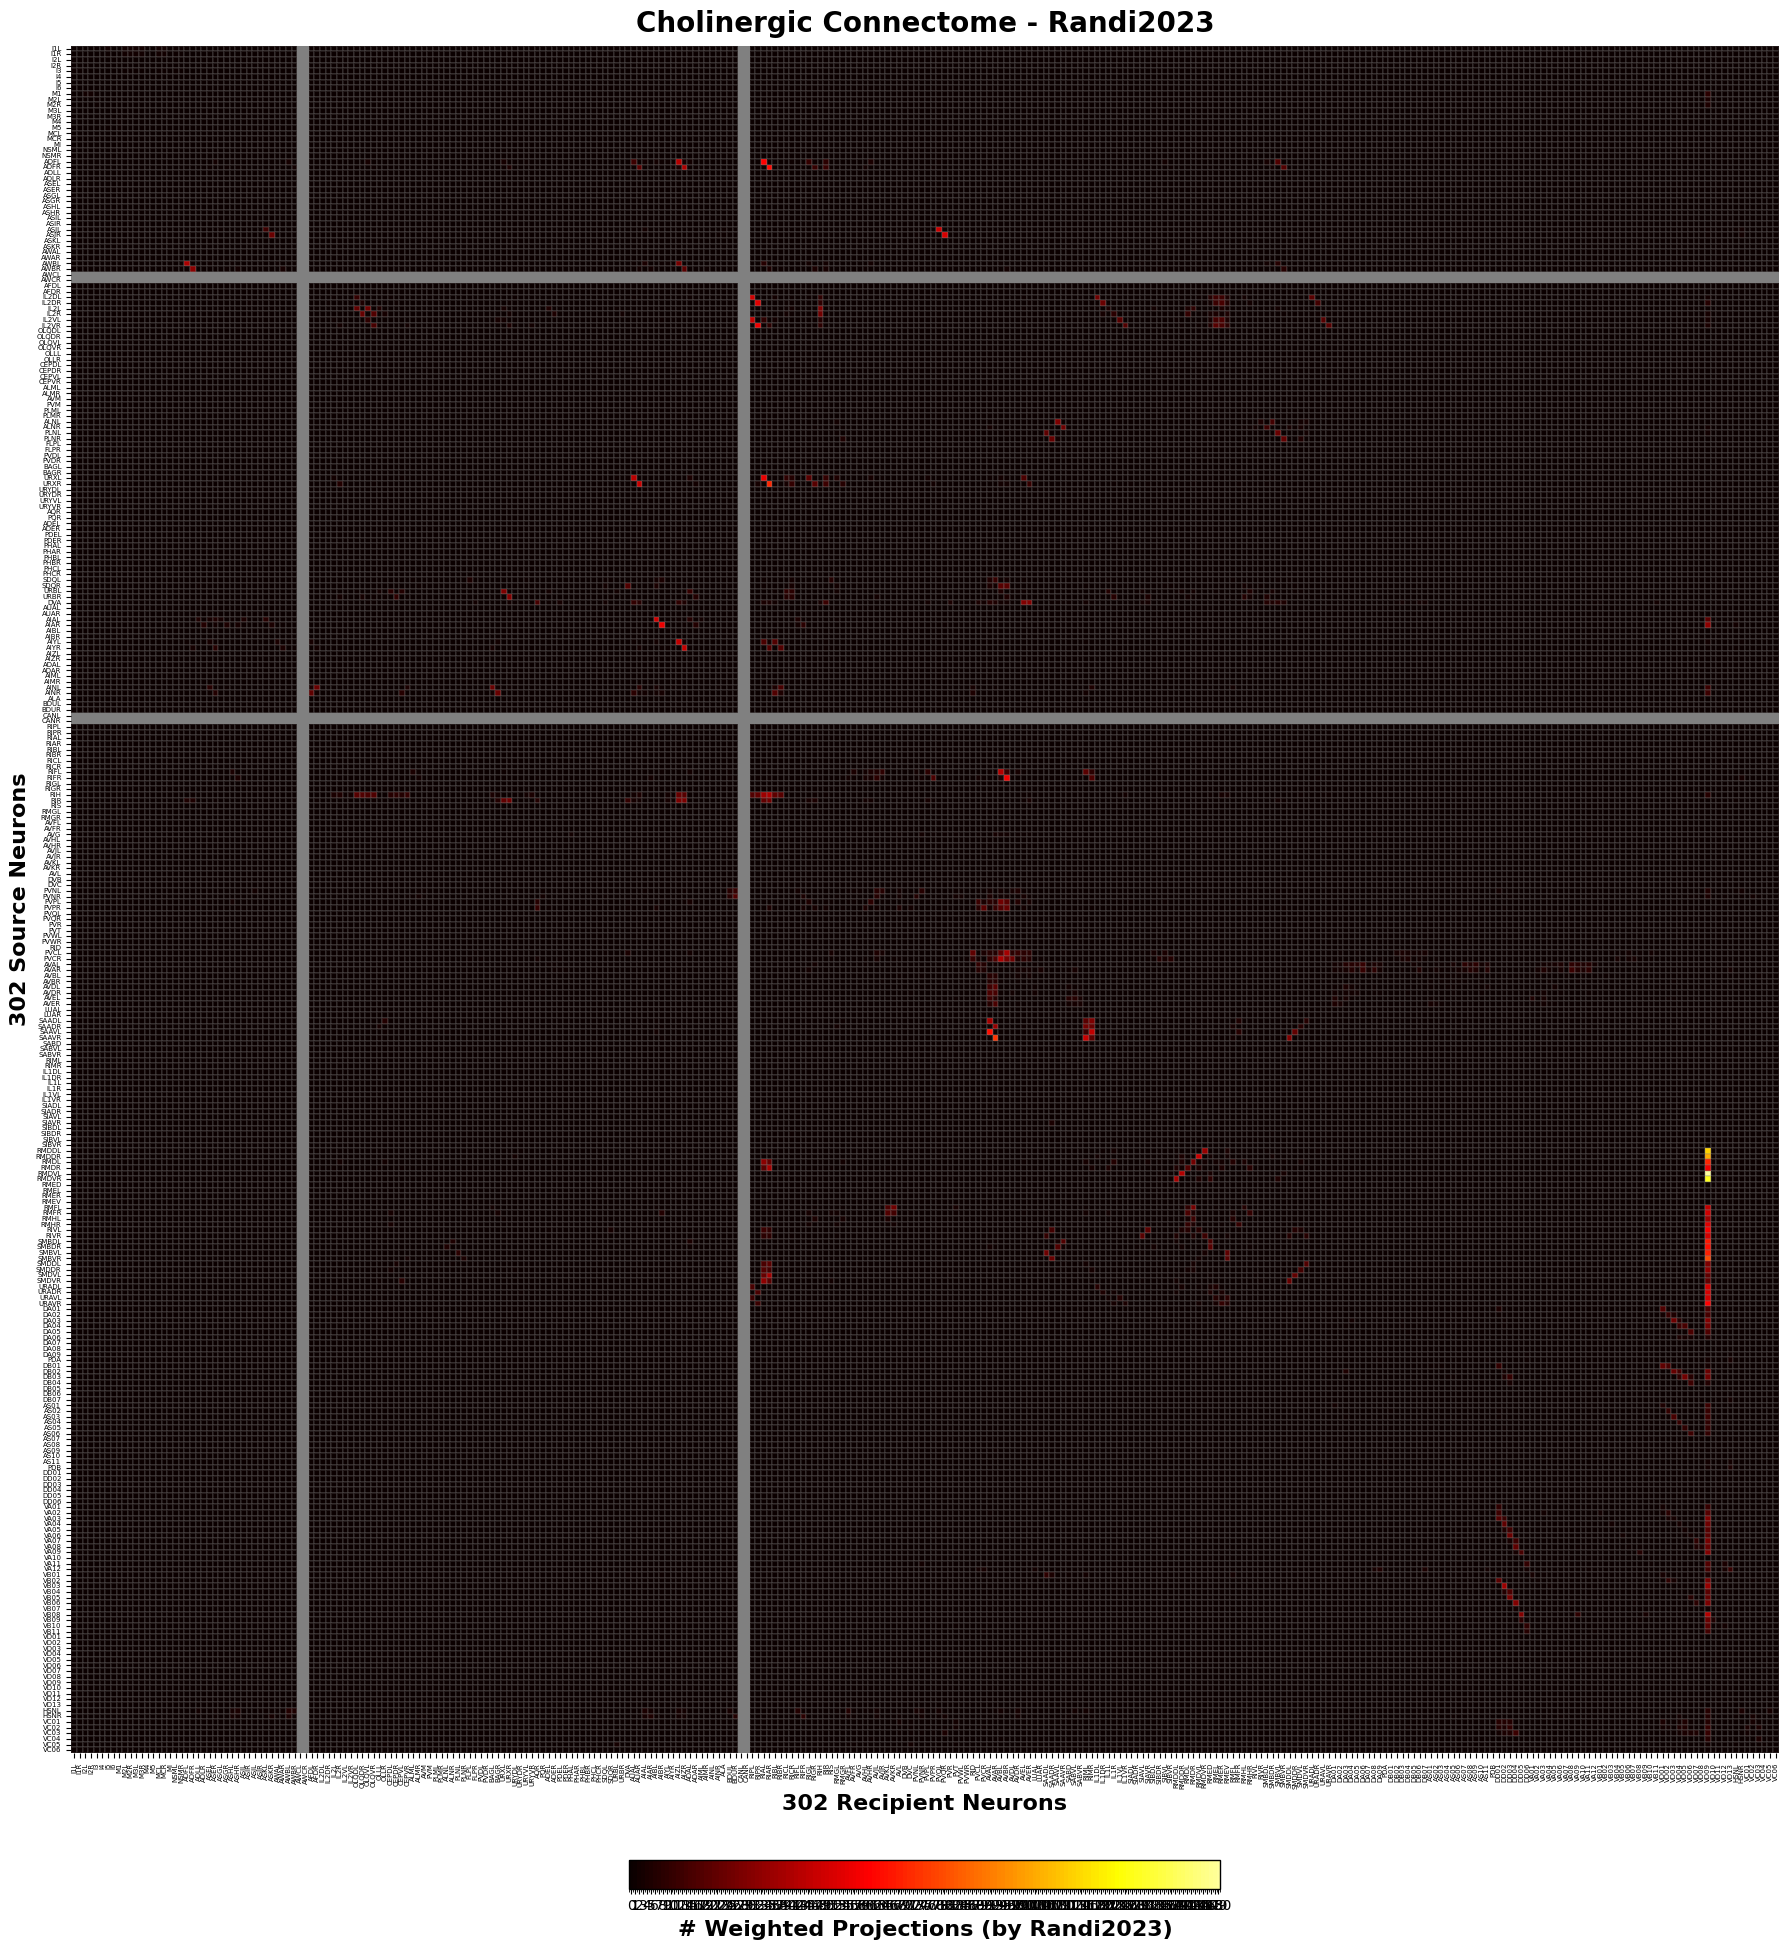

In [14]:
data = cholinergic

fname = 'cholinergic_connectome_randi2023'
title = 'Cholinergic Connectome - Randi2023'
colorbar_label = '# Weighted Projections (by Randi2023)'

df = pd.DataFrame(data, index=nodes, columns=nodes)
std_df = pu.standardize_dataframe(df, pu.AllHermNeurons)
std_fig = pu.plot_connectome_matrix(std_df, title=title, colorbar_label=colorbar_label)

## RipollSanchez2023
You can access the combined neuropeptidergic connectome via OpenWorm, but I made a separate notebook to access data from RipollSanchez's own GitHub repo, which also have the single ligand-receptor connectome. The combined connectome is the same from OpenWorm and RipollSanchez's own GitHub repo.

cect      >>>  Opened up the CSV file: /store1/shared/pub_utils/.venv/lib/python3.10/site-packages/cect/data/01022024_neuropeptide_connectome_short_range_model.csv


Nodes present (302): ['ADAL', 'ADAR', 'ADEL', 'ADER', 'ADFL', 'ADFR', 'ADLL', 'ADLR', 'AFDL', 'AFDR', 'AIAL', 'AIAR', 'AIBL', 'AIBR', 'AIML', 'AIMR', 'AINL', 'AINR', 'AIYL', 'AIYR', 'AIZL', 'AIZR', 'ALA', 'ALML', 'ALMR', 'ALNL', 'ALNR', 'AQR', 'AS1', 'AS10', 'AS11', 'AS2', 'AS3', 'AS4', 'AS5', 'AS6', 'AS7', 'AS8', 'AS9', 'ASEL', 'ASER', 'ASGL', 'ASGR', 'ASHL', 'ASHR', 'ASIL', 'ASIR', 'ASJL', 'ASJR', 'ASKL', 'ASKR', 'AUAL', 'AUAR', 'AVAL', 'AVAR', 'AVBL', 'AVBR', 'AVDL', 'AVDR', 'AVEL', 'AVER', 'AVFL', 'AVFR', 'AVG', 'AVHL', 'AVHR', 'AVJL', 'AVJR', 'AVKL', 'AVKR', 'AVL', 'AVM', 'AWAL', 'AWAR', 'AWBL', 'AWBR', 'AWCL', 'AWCR', 'BAGL', 'BAGR', 'BDUL', 'BDUR', 'CANL', 'CANR', 'CEPDL', 'CEPDR', 'CEPVL', 'CEPVR', 'DA1', 'DA2', 'DA3', 'DA4', 'DA5', 'DA6', 'DA7', 'DA8', 'DA9', 'DB1', 'DB2', 'DB3', 'DB4', 'DB5', 'DB6', 'DB7', 'DD1', 'DD2', 'DD3', 'DD4', 'DD5', 'DD6', 'DVA', 'DVB', 'DVC', 'FLPL', 'FLPR', 'HSNL', 'HSNR', 'I1L', 'I1R', 'I2L', 'I2R', 'I3', 'I4', 'I5', 'I6', 'IL1DL', 'IL1DR', 'IL1L',

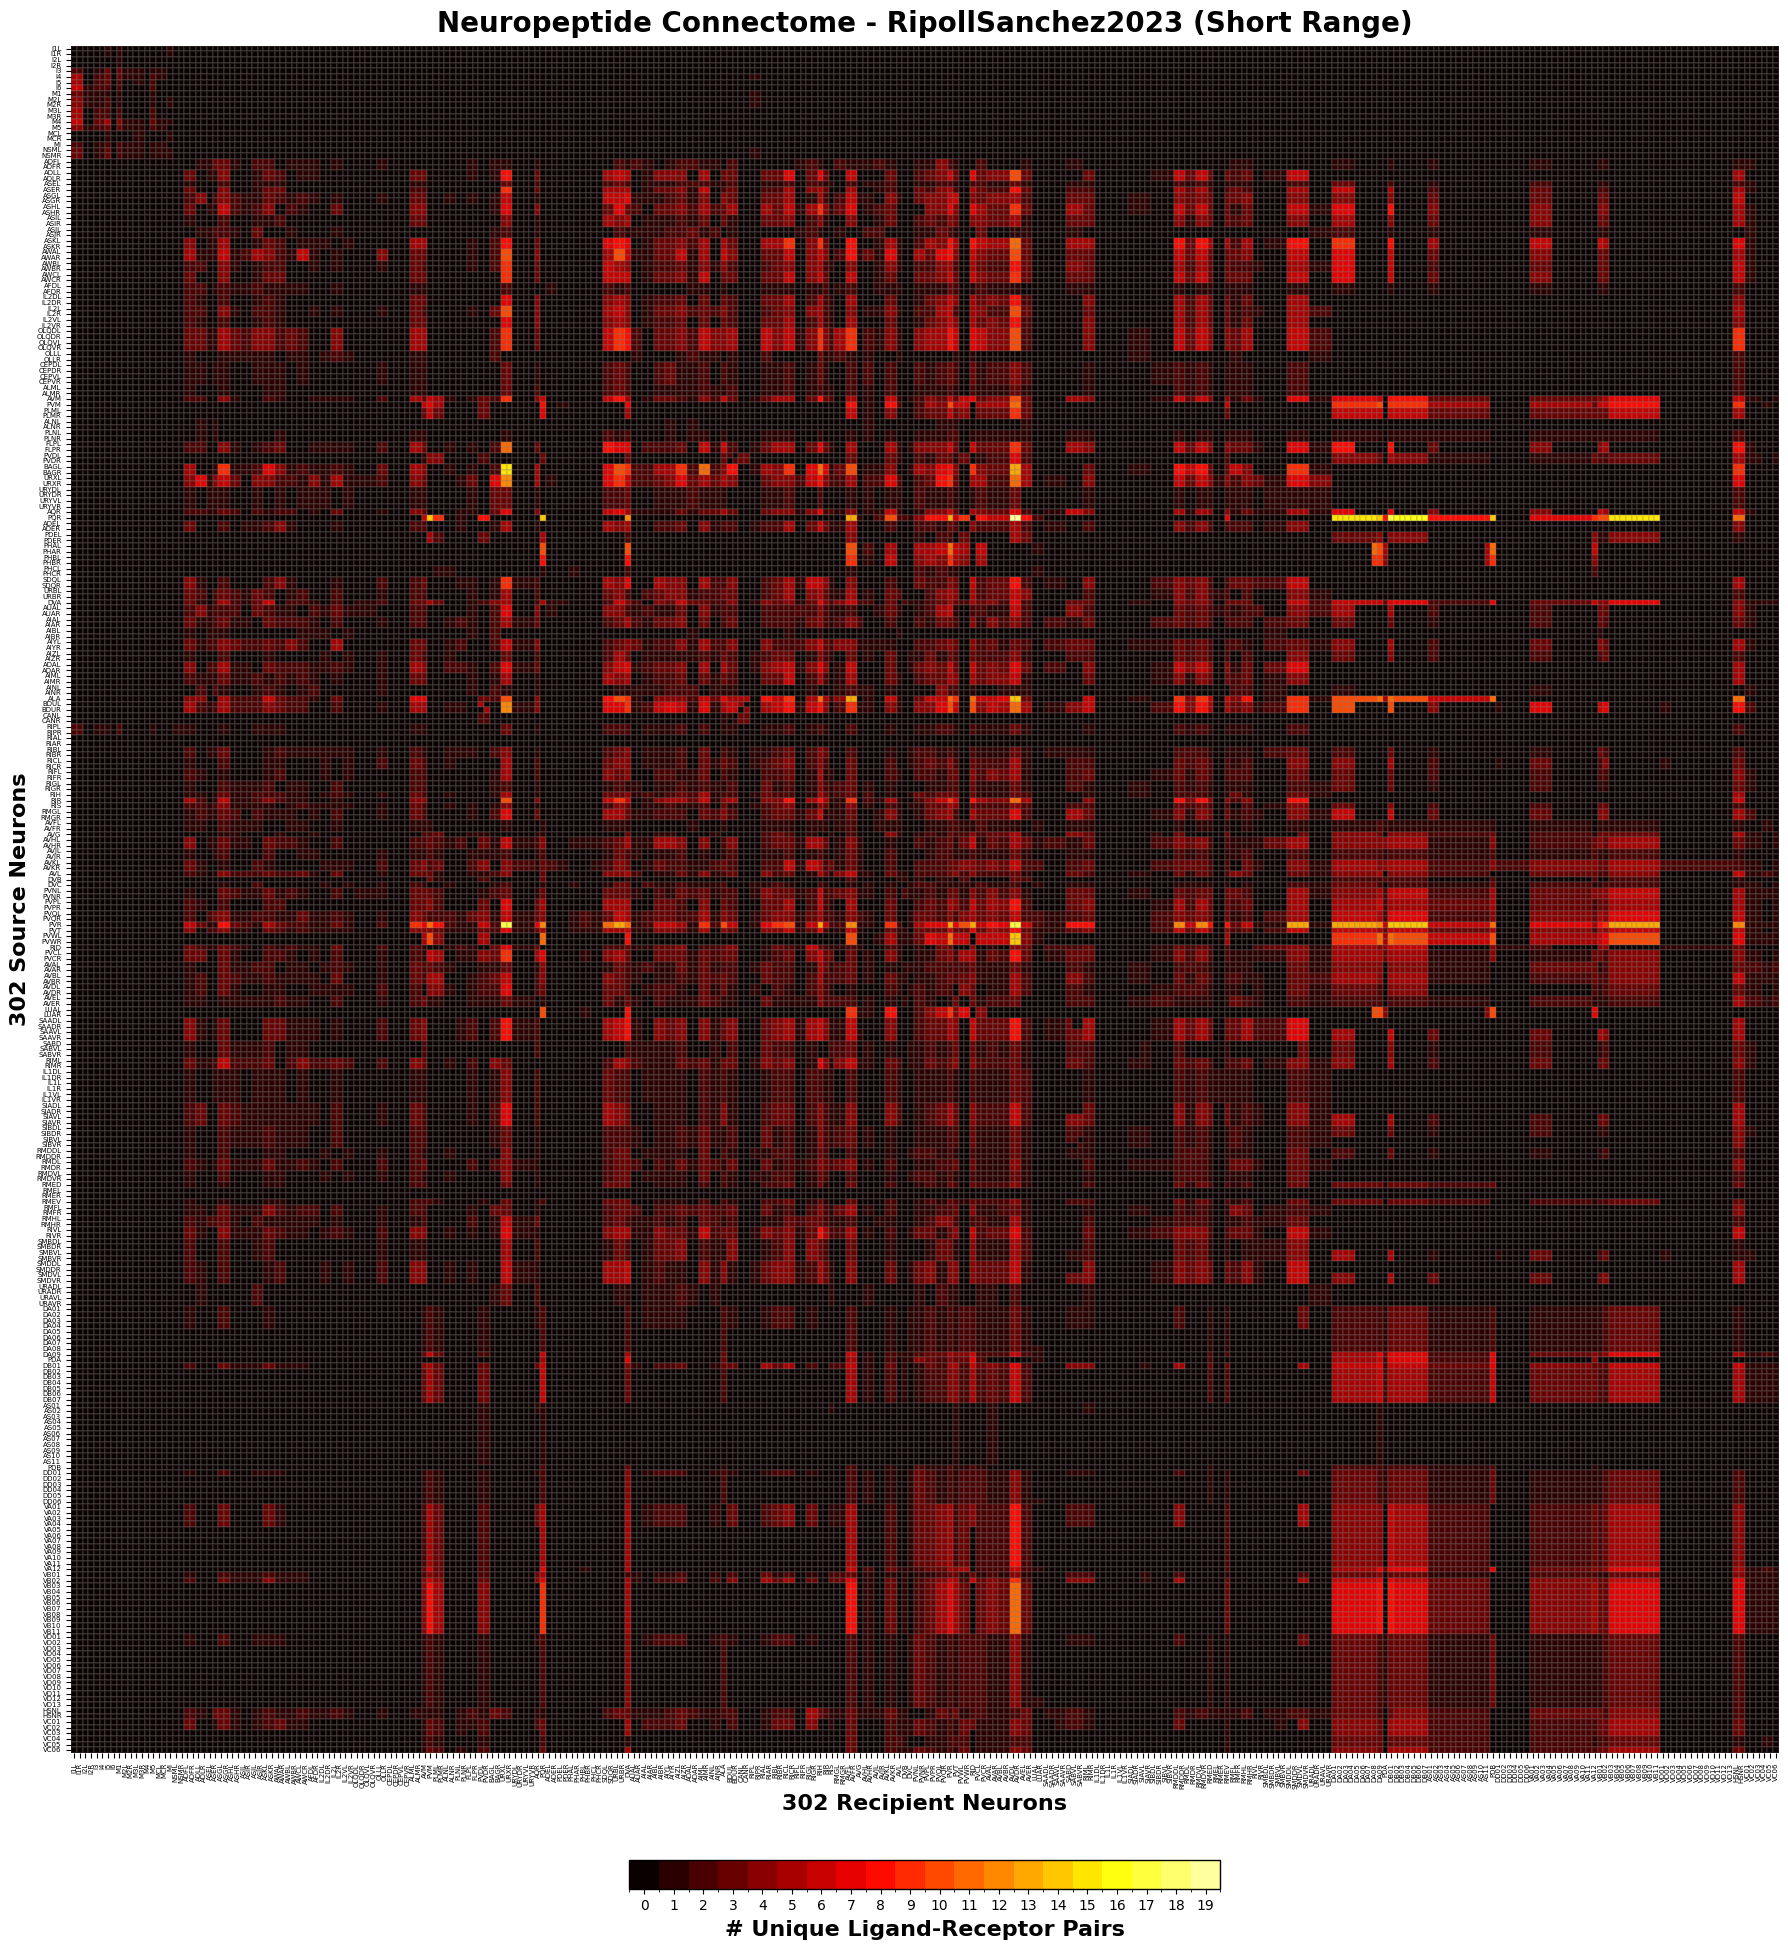

In [16]:
from cect.RipollSanchezShortRangeReader import get_instance

dataset = get_instance()
print(dataset.summary())

nodes = dataset.nodes
short_range_connections = dataset.connections['Peptidergic']

data = short_range_connections
title = 'Neuropeptide Connectome - RipollSanchez2023 (Short Range)'

df = pd.DataFrame(data, index=nodes, columns=nodes)
std_df = pu.standardize_dataframe(df, pu.AllHermNeurons)
std_fig = pu.plot_connectome_matrix(std_df, title=title)

## Wang2024 - adult hermaphrodite, adult male
The recipient ends are confined by structural connections from Cook2019 for glutamate, acetylcholine and GABA. The raw data on neurotransmitter release from Wang2024 is used instead.

In [17]:
import os
os.chdir('../ConnectomeToolbox')
from cect.Wang2024HermReader import get_instance

dataset = get_instance()
print(dataset.summary())

cholinergic = dataset.connections['Acetylcholine']
gabaergic = dataset.connections['GABA']
glutamatergic = dataset.connections['Glutamate']

dopaminergic = dataset.connections['Dopamine']
serotonergic = dataset.connections['Serotonin']
octopaminergic = dataset.connections['Octopamine']
tyramingeric = dataset.connections['Tyramine']
betainergic = dataset.connections['Betaine']

/store1/shared/pub_utils/.venv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


cect      >>>  Opened the Excel file: /store1/shared/pub_utils/.venv/lib/python3.10/site-packages/cect/data/elife-95402-supp2-v1.xlsx
Reading row 5
cect      >>>  Reading row 5: ADAL, NTs: Glutamate, None, None; cat_1_present: False, snf_3_present: False
cect      >>>    - Cell: ADAL, nts: ['Glutamate']
Reading row 6
cect      >>>  Reading row 6: ADAR, NTs: Glutamate, None, None; cat_1_present: False, snf_3_present: False
cect      >>>    - Cell: ADAR, nts: ['Glutamate']
Reading row 7
cect      >>>  Reading row 7: ADEL, NTs: Dopamine, None, None; cat_1_present: True, snf_3_present: False
cect      >>>    - Cell: ADEL, nts: ['Dopamine']
Reading row 8
cect      >>>  Reading row 8: ADER, NTs: Dopamine, None, None; cat_1_present: True, snf_3_present: False
cect      >>>    - Cell: ADER, nts: ['Dopamine']
Reading row 9
cect      >>>  Reading row 9: ADFL, NTs: Acetylcholine, Serotonin, None; cat_1_present: True, snf_3_present: False
cect      >>>    - Cell: ADFL, nts: ['Acetylcholine', 'Sero

In [ ]:
from cect.Wang2024MaleReader import get_instance

dataset = get_instance()
print(dataset.summary())

nodes = dataset.nodes
cholinergic = dataset.connections['Acetylcholine']
gabaergic = dataset.connections['GABA']
glutamatergic = dataset.connections['Glutamate']

dopaminergic = dataset.connections['Dopamine']
serotonergic = dataset.connections['Serotonin']
octopaminergic = dataset.connections['Octopamine']
tyramingeric = dataset.connections['Tyramine']
betainergic = dataset.connections['Betaine']